##Part 1
$g(\mathbf{x}) = \mathbf{x}^T\begin{bmatrix}1 \ \ 0\\ 0 \ \  1\end{bmatrix}\mathbf{x} + \begin{bmatrix}98 \ \ -72\end{bmatrix}\mathbf{x} + 3697$

where A is 2*2 identity matrix, $\mathbf{x} = \begin{bmatrix} x_1  \\ x_2 \end{bmatrix}$ and b is given above.

**The function f is a sum of squares and thus it is always greater or equal to 0 and hence the min value can be achieved at (2,4) or (-2,4)**

**Similarly the g is minimum at (-49,36)**

$$
\min _{\alpha \geqslant 0} f(x-\alpha \nabla f(x)) .
$$
since the function now becomes a one variable function and can be solved as follows:
Note that,
$$
\nabla f=\left\langle 1024 x_1\left(x_1^2-x_2\right)+2 x_1-4,-512 x_1^2+512 x_2\right\rangle
$$

Therefore
$$
\begin{aligned}
& \underset{\alpha>0}{\operatorname{argmin}} f(x-\alpha \nabla f) \\
& =f\left(x_1-\alpha\left(1024 x_1\left(x_1^2-x_2\right)+2 x_1-4\right),\quad x_2-\alpha\left(512 x_2-512 x_1^2\right)\right)
\end{aligned}
$$

This is a quartic function in $\alpha$ and will not have a unique sol ${ }^n$ for $\operatorname{argmin}_{\alpha \geqslant 0}$.
Closed form solution may exist but it is very hard to calculate it and will not be unique i.e. dependent of $x_1 $ and $ x_2$

In [1]:
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1st algorithm
taus = [10**(-p) for p in range(1, 16)]
x0 = np.array([36,-49])

def gradg(x1,x2):
  return np.array([-2*(x1+49), -2*(x2-36)])

def g(x1,x2):
  return (x1 + 49)**2 + (x2-36)**2

In [3]:
iterations = []
for t in taus:
  xk = np.copy(x0)
  iteration = 0
  pk = gradg(xk[0],xk[1])
  while norm(pk)>t:
    step = 0.5
    xk = xk + step*pk
    pk = gradg(xk[0],xk[1])
    iteration += 1
  iterations.append(iteration)


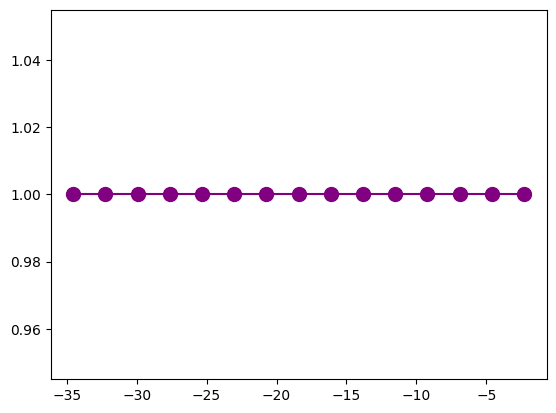

In [4]:
plt.plot(np.log(taus), iterations, marker='o', markersize=10, linestyle='-', color='purple', label='Iterations')
plt.show()

In [5]:
# 2nd algorithm
l = 0.001
x0 = np.array([-30,20])
taus = [10**(-p) for p in range(1,12)]
iterations_new= []

for t in taus:
  xk = np.copy(x0)
  iteration = 0
  pk = gradg(xk[0],xk[1])

  while norm(pk) > t:
    xk = xk + l*pk
    pk = gradg(xk[0],xk[1])
    iteration += 1

  iterations_new.append(iteration)

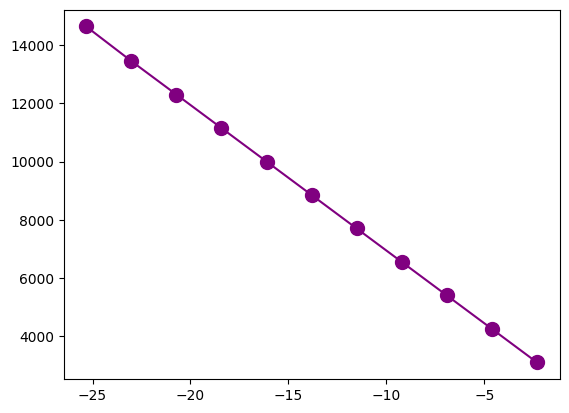

In [6]:
plt.plot(np.log(taus), iterations_new, marker='o', markersize=10, linestyle='-', color='purple', label='Iterations')
plt.show()

***Observing the graphs we can see that the Algorithm 1 containing the exact line search gets to the optimal solution in one step which on the other hand the 2nd algo utilizes a constant step size and thus takes more iterations to come to the  minimum and thus showing a negative relation btw tolerance level and iteration count.***

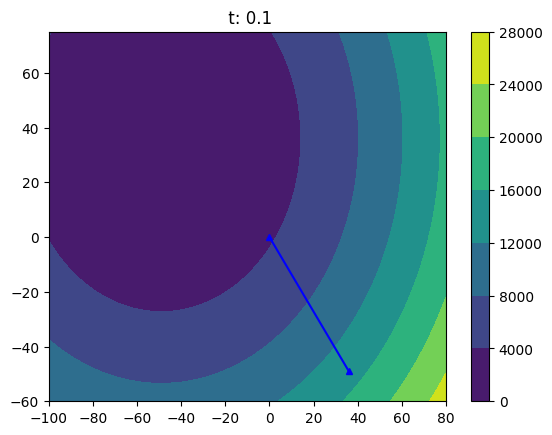

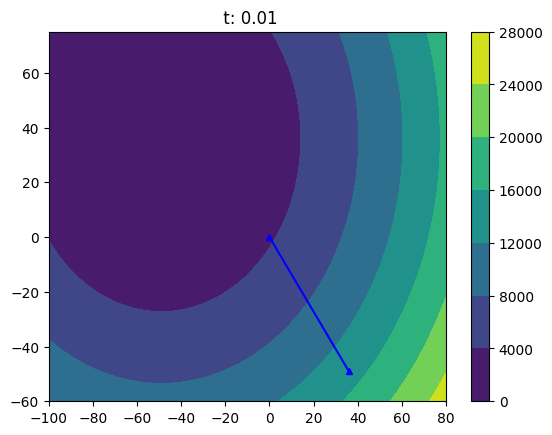

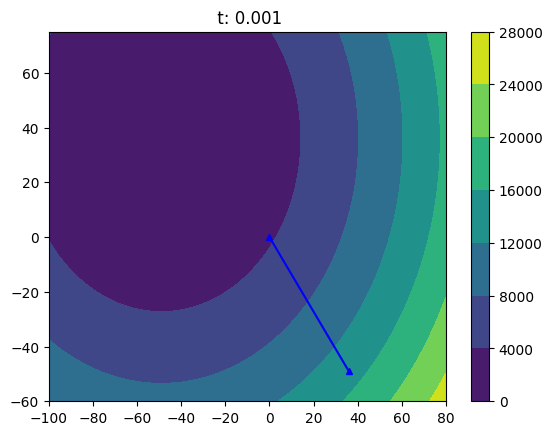

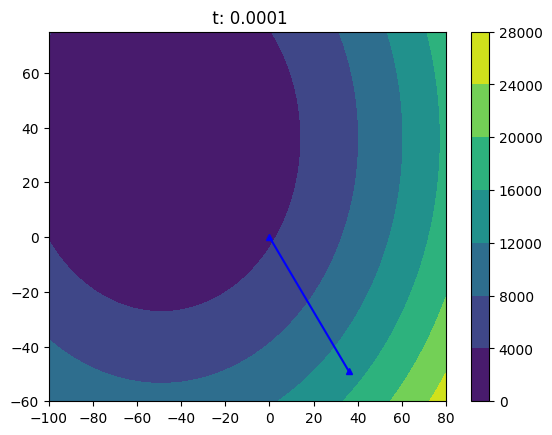

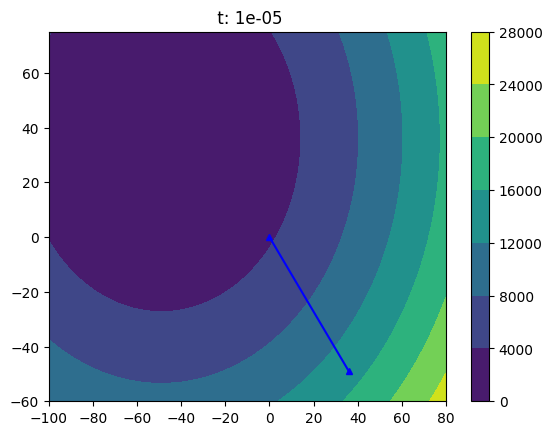

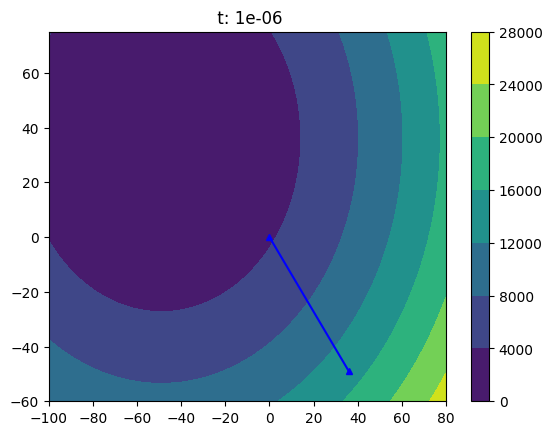

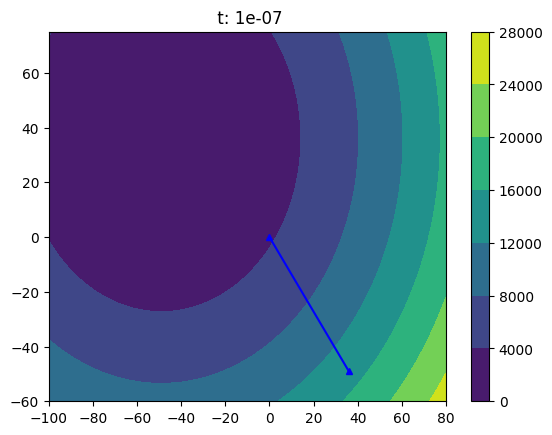

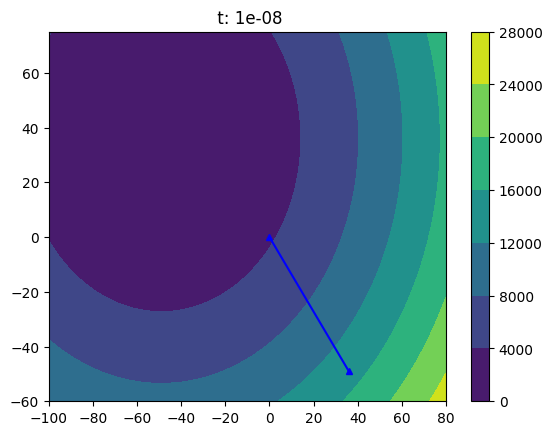

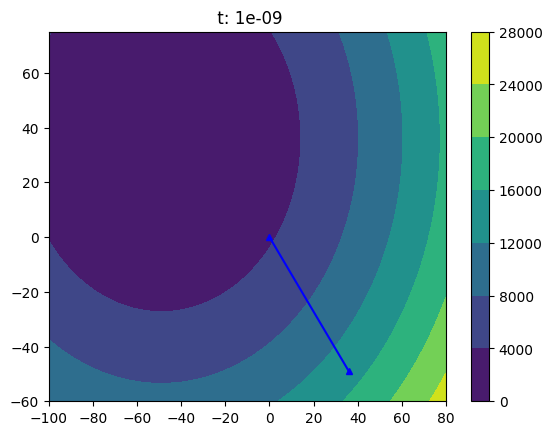

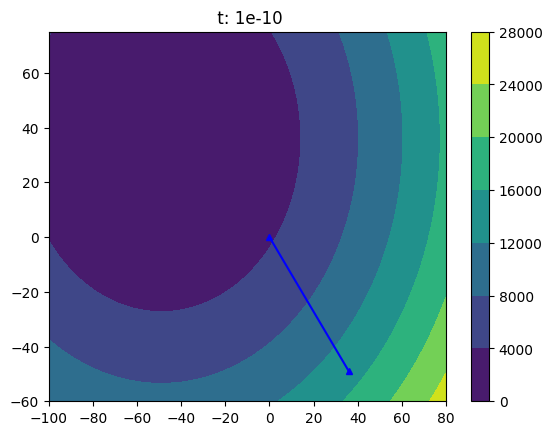

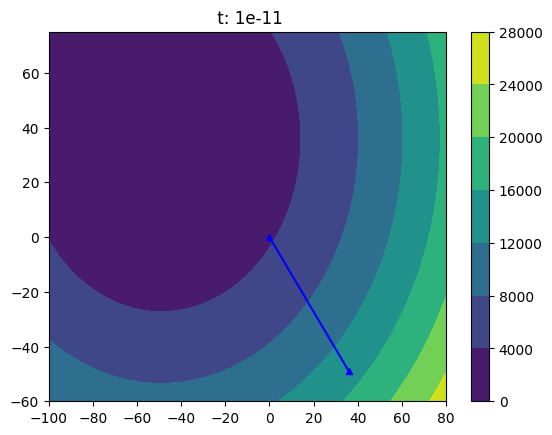

In [7]:
from matplotlib import ticker, cm
x = np.linspace(-100,80,1000)
y = np.linspace(-60,75,1000)
x0 = np.array([36,-49])
for t in taus:
  xk = np.copy(x0)
  X,Y = np.meshgrid(x,y)

  Z = g(X,Y)
  xc = []
  yc = []
  xc.append(xk[0])
  yc.append(xk[1])
  p=plt.contourf(X,Y,Z)
  cbar = plt.colorbar(p)

  while norm(pk)>t:
    step = 0.5
    xk = xk + step*pk
    xc.append(xk[0])
    yc.append(xk[1])
    pk = gradg(xk)
    iteration += 1
  xc.append(0)
  yc.append(0)

  plt.plot(xc,yc, marker='^', color="blue", markersize = 5)
  plt.title(" t: "+str(t))
  plt.show()
  iterations.append(iteration)

In [8]:
xc,yc

([36, 0], [-49, 0])

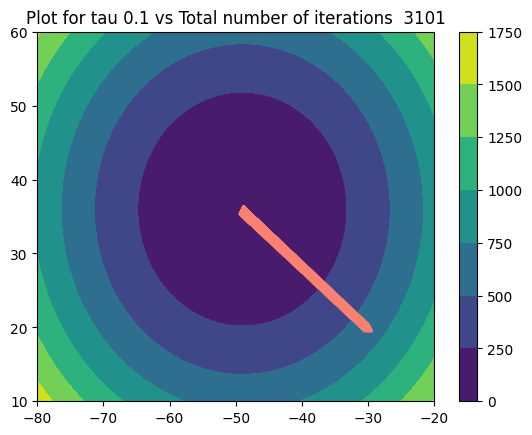

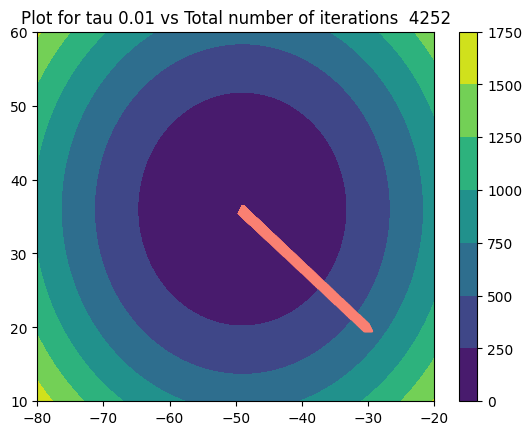

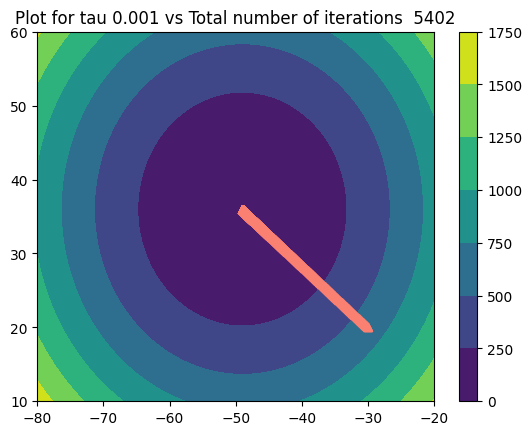

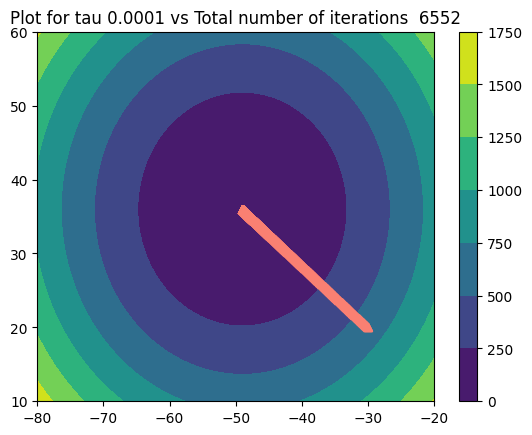

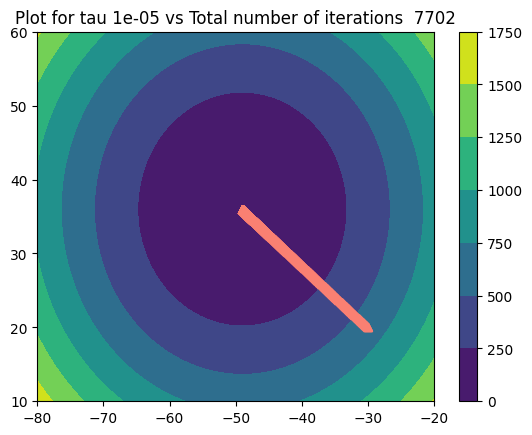

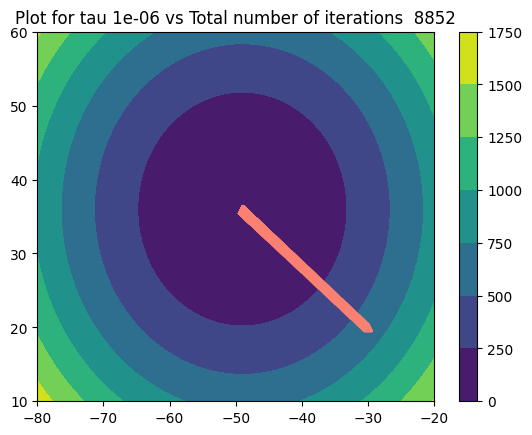

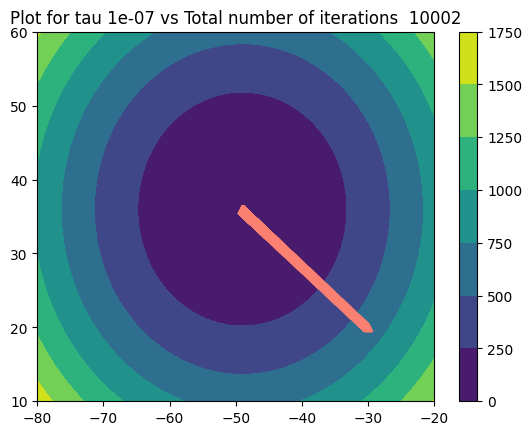

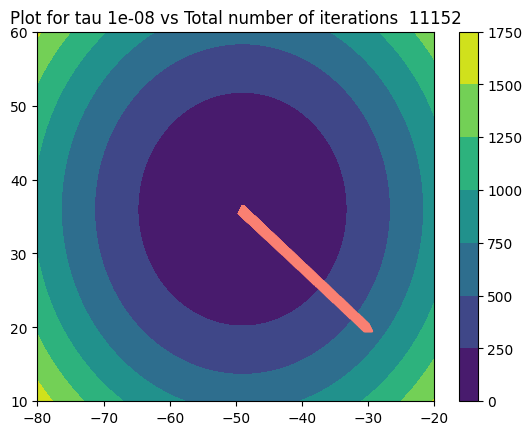

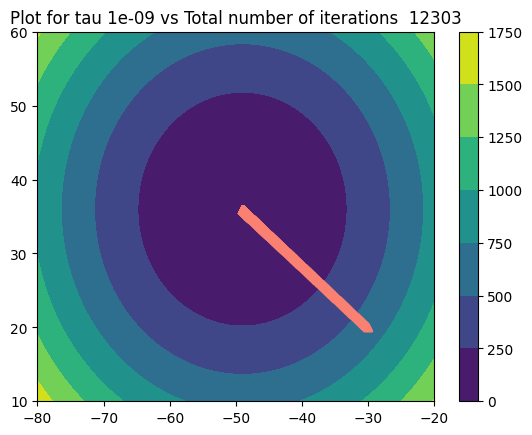

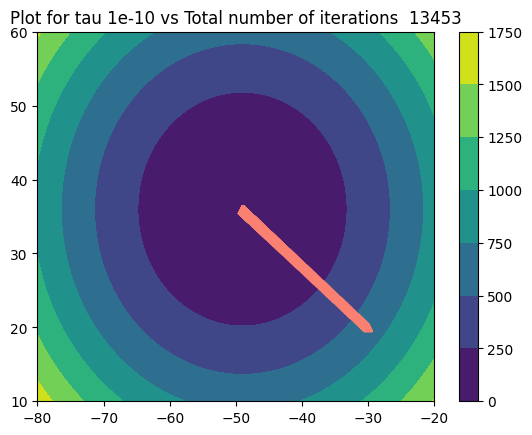

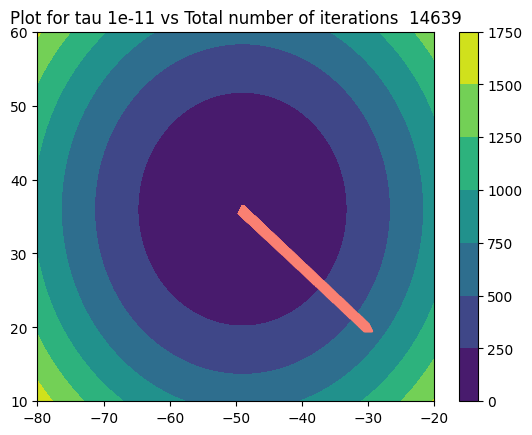

In [9]:
alpha = 0.001
x0 = np.array([-30,20])

taus = [10**(-p) for p in range(1,12)]



argmin_store = []
min_value = []
iterations2 = []

for tau in taus:
  xk = np.copy(x0)
  iteration = 0
  pk = gradg(xk[0],xk[1])

  x = np.linspace(-80, -20, 1000)
  y = np.linspace(10, 60, 1000)
  X, Y = np.meshgrid(x, y)
  Z = g(X,Y)
  p = plt.contourf(X,Y,Z)
  cbar = plt.colorbar(p)


  xc = []
  yc = []
  xc.append(xk[0])
  yc.append(xk[1])
  while norm(pk) > tau:
    xk = xk + alpha*pk
    pk = gradg(xk[0],xk[1])
    iteration  += 1
    xc.append(xk[0])
    yc.append(xk[1])

  plt.plot(xc,yc, marker='^', color="salmon")
  plt.title(f"Plot for tau {str(tau)} vs Total number of iterations  {iteration }")
  plt.show()



***When the function will be in higherr dimension then it will be computationally very expensive as finding the optimal step size maybe hard***

**also Exact line search will not work for non-differentiable or not continuous functions as well**